# Unit 5 - Financial Planning

In [173]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [174]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [175]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [176]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [177]:
# Fetch current BTC price in US Dollars (with respect to the MARKING CRITERIA)
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

## Check that BTC price has been fetched
print(f"${btc_price}")

$19142.77


In [178]:
# Fetch current ETH price in US Dollars (with respect to the MARKING CRITERIA)
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

## Check that ETH price has been fetched
print(f"${eth_price}")

$1283.08


In [179]:
# Compute current value of my crypto

## Current value of BTC
my_btc_value = btc_price*my_btc

## Current value of ETH
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22971.32
The current value of your 5.3 ETH is $6800.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [180]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [181]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
api_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version = "v2"
)

In [182]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_holdings = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_holdings[df_holdings["symbol"] == "AGG"].drop("symbol", axis = 1)
SPY = df_holdings[df_holdings["symbol"] == "SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
df_holdings = pd.concat([AGG, SPY], axis = 1, keys = ["AGG", "SPY"])

# Preview DataFrame
df_holdings

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-10-14 04:00:00+00:00  95.63  95.63  94.61  94.66  8567937       22665   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-10-14 04:00:00+00:00  94.776094  368.54  370.26  356.96  357.63   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-10-14 04:00:00+00:00  122920585      818595  361.365272

In [183]:
# Pick AGG and SPY close prices
agg_close_price = float(df_holdings["AGG"]["close"])
spy_close_price = float(df_holdings["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.66
Current SPY closing price: $357.63


In [184]:
# Compute the current value of shares
my_agg_value = agg_close_price*my_agg
my_spy_value = spy_close_price*my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17881.50
The current value of your 200 AGG shares is $18932.00


### Savings Health Analysis

In [185]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto = my_btc_value + my_eth_value
my_shares = my_spy_value + my_agg_value

# Create savings DataFrame
data = {
    "Amount" : [my_crypto, my_shares]
}
df_savings = pd.DataFrame(data, index = [
    "Crypto",
    "Shares"
]
)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,29771.648
Shares,36813.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

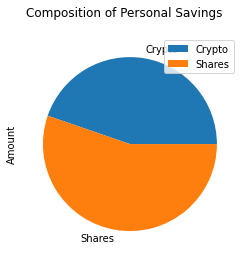

In [186]:
# Plot savings pie chart
df_savings.plot(kind = "pie", title = "Composition of Personal Savings", subplots = True)

In [189]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(my_crypto + my_shares, 2)

## Difference between total savings and emergency fund
difference = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund. ${total_savings} to be exact!")
elif total_savings == emergency_fund:
    print("Congratulations, your savings are sufficient for an emergency fund, but make sure to save more!")
elif total_savings < emergency_fund:
    print(f"You are currently ${difference} away from your savings goal. Keep saving!")

Congratulations! You have enough money in your emergency fund. $66585.15 to be exact!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [156]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-10-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-10-01', tz='America/New_York').isoformat()

In [164]:
# Get 5 years' worth of historical data for SPY and AGG

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_historical = df_stock_data[df_stock_data["symbol"] == "AGG"].drop("symbol", axis = 1)
SPY_historical = df_stock_data[df_stock_data["symbol"] == "SPY"].drop("symbol", axis = 1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_historical, SPY_historical], axis = 1, keys = ["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-10-02 04:00:00+00:00  109.43  109.51  109.3300  109.43  5692248   
2017-10-03 04:00:00+00:00  109.46  109.54  109.4000  109.52  2462485   
2017-10-04 04:00:00+00:00  109.56  109.57  109.4100  109.49  2673151   
2017-10-05 04:00:00+00:00  109.54  109.54  109.3701  109.44  1909925   
2017-10-06 04:00:00+00:00  109.22  109.42  109.1499  109.28  1823984   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2017-10-02 04:00:00+00:00       17043  109.424156  251.50  252.3200  251.2926   
2017-10-03 04:00:00+00:00       12428  109.492033  252.48  252.8900  252.2300   
2017-10-04 04:00:00+00:00        9641  109.495974  252.72  253.4400  252.5600   
2017-10-05 04:00:00+00:00        9909  109.444077  253.54  254.6800  253.1960   
2017-10-06 04:00:00+00:00        8688  109.303491  254.16  254.7008  253.8500   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-10-02 04:00:00+00:00  252.32  59020425      173638  251.973512  
2017-10-03 04:00:00+00:00  252.86  66650169      147208  252.585149  
2017-10-04 04:00:00+00:00  253.16  55953619      136448  253.025019  
2017-10-05 04:00:00+00:00  254.66  63522757      195996  254.224339  
2017-10-06 04:00:00+00:00  254.37  80645998      186516  254.301326

In [166]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [167]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-10-02 04:00:00+00:00  109.43  109.51  109.3300  109.43  5692248   
2017-10-03 04:00:00+00:00  109.46  109.54  109.4000  109.52  2462485   
2017-10-04 04:00:00+00:00  109.56  109.57  109.4100  109.49  2673151   
2017-10-05 04:00:00+00:00  109.54  109.54  109.3701  109.44  1909925   
2017-10-06 04:00:00+00:00  109.22  109.42  109.1499  109.28  1823984   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-10-02 04:00:00+00:00       17043  109.424156          NaN  251.50   
2017-10-03 04:00:00+00:00       12428  109.492033     0.000822  252.48   
2017-10-04 04:00:00+00:00        9641  109.495974    -0.000274  252.72   
2017-10-05 04:00:00+00:00        9909  109.444077    -0.000457  253.54   
2017-10-06 04:00:00+00:00        8688  109.303491    -0.001462  254.16   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2017-10-02 04:00:00+00:00  252.3200  251.2926  252.32  59020425      173638   
2017-10-03 04:00:00+00:00  252.8900  252.2300  252.86  66650169      147208   
2017-10-04 04:00:00+00:00  253.4400  252.5600  253.16  55953619      136448   
2017-10-05 04:00:00+00:00  254.6800  253.1960  254.66  63522757      195996   
2017-10-06 04:00:00+00:00  254.7008  253.8500  254.37  80645998      186516   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-10-02 04:00:00+00:00  251.973512          NaN  
2017-10-03 04:00:00+00:00  252.585149     0.002140  
2017-10-04 04:00:00+00:00  253.025019     0.001186  
2017-10-05 04:00:00+00:00  254.224339     0.005925  
2017-10-06 04:00:00+00:00  254.301326    -0.001139

In [168]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\navpr\Documents\Fintech Bootcamp!\Week 5\Challenge\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003420,1.011507,0.993461,1.004257,0.976353,0.987350,0.989402,0.997469,0.999045,0.999388,...,0.998741,0.985537,1.005961,1.012575,1.000760,1.008707,0.998200,0.993953,1.003558,1.006848
2,1.001949,1.014826,1.009157,1.016713,0.972714,0.984244,0.986763,1.003325,0.993902,0.999033,...,0.999154,0.981369,1.001400,1.010961,0.992620,1.001582,1.006743,0.993122,1.004479,0.994434
3,1.002489,1.017586,1.006295,1.016331,0.976124,0.978267,0.983058,1.004506,0.983408,0.997292,...,0.992633,0.969950,0.994263,1.019928,0.993669,0.999335,1.024330,0.987653,0.995564,0.987251
4,1.001134,1.009178,1.000263,1.025448,0.969690,0.983781,0.981441,0.998962,0.983690,1.000151,...,0.997416,0.964412,1.001375,1.026505,0.992186,0.993190,1.019136,0.985143,0.977199,0.993704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.502724,4.138332,5.961677,4.541827,0.550396,3.862649,3.440478,2.277203,9.466704,5.663756,...,5.724427,0.719958,8.813928,7.118298,7.620709,3.934102,1.491841,1.905674,3.064744,2.511229
7557,1.532402,4.175677,5.924661,4.503138,0.549438,3.859429,3.443154,2.282981,9.436985,5.676548,...,5.736339,0.720584,8.763182,7.167546,7.623361,3.890829,1.472630,1.892115,3.053420,2.535565
7558,1.534607,4.167650,6.027598,4.525719,0.547087,3.844020,3.437821,2.297295,9.279574,5.739356,...,5.716225,0.715289,8.850734,7.160739,7.610382,3.890178,1.473730,1.904837,3.058912,2.514708
7559,1.530783,4.193544,5.998494,4.512269,0.547521,3.775640,3.446828,2.287174,9.390413,5.837311,...,5.698206,0.717203,8.892604,7.229896,7.675976,3.950564,1.481940,1.903793,3.036973,2.518710


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

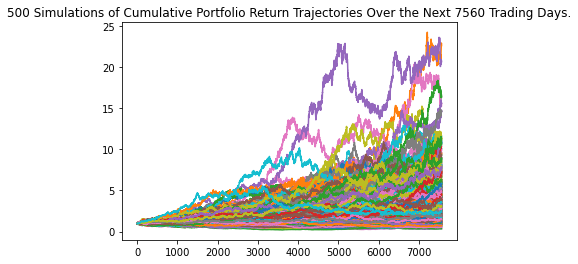

In [169]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

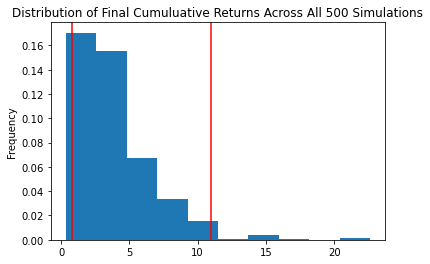

In [170]:
# Plot probability distribution and confidence intervals
MC_thirty_year.plot_distribution()

### Retirement Analysis

In [200]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_1 = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_1)

count           500.000000
mean              3.909271
std               2.860871
min               0.343402
25%               1.924984
50%               3.170493
75%               5.074979
max              22.638619
95% CI Lower      0.803220
95% CI Upper     10.973842
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [218]:
# Set initial investment
initial_investment_1 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_1 = round(summary_stats_1[8]*initial_investment_1, 2)
ci_upper_1 = round(summary_stats_1[9]*initial_investment_1, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_1} and ${ci_upper_1}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16064.4 and $219476.84


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [219]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(summary_stats_1[8]*initial_investment_2, 2)
ci_upper_2 = round(summary_stats_1[9]*initial_investment_2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24096.59 and $329215.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [193]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [194]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\navpr\Documents\Fintech Bootcamp!\Week 5\Challenge\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999739,0.984168,0.988108,0.974907,1.016201,0.997746,1.001416,1.004132,1.000556,0.997674,...,1.004585,1.003113,1.007971,1.006931,0.999342,0.987429,1.007676,1.004655,0.996329,0.998607
2,0.999486,0.992675,0.995638,0.973808,1.003694,0.993550,1.016933,1.000763,1.015232,1.003815,...,0.994254,1.007377,1.014721,1.001035,1.000752,0.984263,1.001903,1.004098,0.999055,1.003573
3,1.016963,0.991009,0.980793,0.985770,1.005343,0.989675,1.010631,1.007593,1.023420,0.995904,...,0.982906,1.030341,1.016656,1.004810,0.999775,0.978537,1.014519,0.998423,0.980911,1.005064
4,1.020573,0.994038,0.990900,0.982024,1.016740,0.987836,1.018828,1.005455,1.019774,0.992048,...,0.977804,1.020865,1.012274,1.011442,1.003479,0.979126,1.016939,0.985667,0.975053,1.011844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.139173,1.320176,1.039347,1.131673,1.508339,1.008833,1.149881,1.743854,0.755499,1.180730,...,0.831040,1.438414,1.010689,1.371336,1.778610,0.964411,0.800731,1.305357,0.930246,0.843065
1257,1.150094,1.316289,1.037986,1.122622,1.508990,1.007156,1.163255,1.777955,0.756897,1.178960,...,0.836056,1.427966,1.001281,1.374889,1.769171,0.978878,0.802791,1.302486,0.927671,0.833853
1258,1.154005,1.320525,1.045849,1.121318,1.506504,1.005913,1.154821,1.774280,0.756873,1.186269,...,0.837928,1.433042,0.997821,1.367709,1.766292,0.967139,0.805161,1.310870,0.936680,0.841846
1259,1.142737,1.336577,1.041046,1.122462,1.528612,1.009629,1.162845,1.756726,0.762294,1.182977,...,0.840189,1.425621,1.003388,1.384731,1.772580,0.979856,0.802105,1.336702,0.941968,0.832071


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

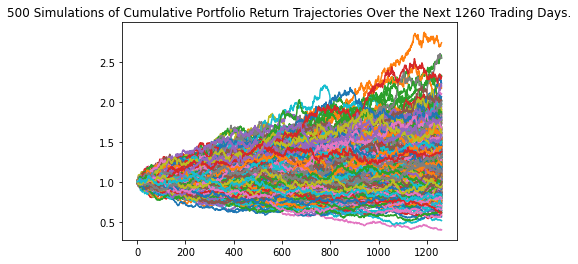

In [195]:
# Plot simulation outcomes
MC_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

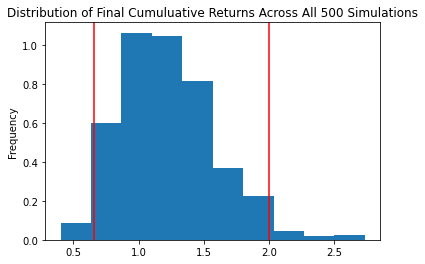

In [196]:
# Plot probability distribution and confidence intervals
MC_five_year.plot_distribution()

In [210]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5year = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5year)

count           500.000000
mean              1.228763
std               0.358141
min               0.401070
25%               0.970731
50%               1.189868
75%               1.447665
max               2.737589
95% CI Lower      0.660935
95% CI Upper      2.002642
Name: 1260, dtype: float64


In [221]:
# Set initial investment
initial_investment_3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_3 = round(summary_stats_5year[8]*initial_investment_3, 2)
ci_upper_3 = round(summary_stats_5year[9]*initial_investment_3, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_3} and ${ci_upper_3}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $39656.1 and $120158.54


### Ten Years Retirement Option

In [214]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns (20% AGG bonds + 80% SPY stocks)
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [215]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\navpr\Documents\Fintech Bootcamp!\Week 5\Challenge\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001471,0.986433,1.009083,0.999895,1.008561,1.000671,1.010431,1.002770,1.002813,0.990049,...,0.987960,0.982498,0.996598,1.001248,1.012709,1.017008,0.998362,1.013776,0.995311,0.993197
2,0.999226,0.997475,0.992773,1.019232,0.997480,0.991550,1.018827,1.006520,0.997467,0.990991,...,0.994780,0.979279,0.992174,1.001836,1.013266,1.014238,1.003583,1.011486,0.986684,1.016463
3,0.991800,1.004258,0.961646,1.025856,1.001126,0.979959,1.020737,0.996479,1.001571,0.990500,...,1.005315,0.991106,0.994199,0.983700,1.007850,1.007290,1.018023,0.984001,0.983465,1.025843
4,1.001258,1.005869,0.973163,1.045204,0.978626,0.982164,1.002492,1.016521,0.996036,0.991452,...,1.019597,0.997274,1.001938,0.995900,1.007776,0.991391,1.026626,0.994265,0.984603,1.021361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.602734,2.855066,2.052269,2.715239,1.879380,0.714659,2.513672,0.978405,1.015411,3.480458,...,1.468650,0.461573,3.135262,1.860973,1.595285,1.431047,2.708425,3.111248,1.813516,1.309604
2517,0.598179,2.839585,2.027686,2.729926,1.873191,0.712661,2.521178,0.977916,1.011200,3.462986,...,1.460956,0.459738,3.148086,1.846892,1.615771,1.427818,2.700554,3.163412,1.808776,1.307377
2518,0.595569,2.808493,2.023595,2.741295,1.866528,0.706568,2.572174,0.988310,1.020213,3.466127,...,1.430474,0.458059,3.140534,1.845704,1.618803,1.422028,2.696559,3.182283,1.780288,1.280247
2519,0.594149,2.782107,2.053715,2.763181,1.892301,0.713414,2.531289,0.973505,1.013458,3.505125,...,1.409100,0.459030,3.118681,1.840722,1.632264,1.428591,2.692110,3.178383,1.769839,1.263792


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

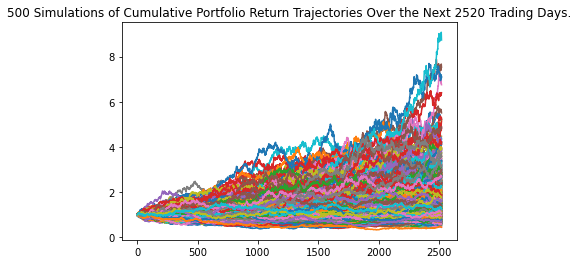

In [216]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

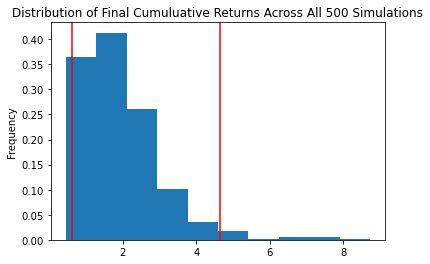

In [217]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [222]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10year = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10year)

count           500.000000
mean              1.942352
std               1.100479
min               0.450324
25%               1.174495
50%               1.707240
75%               2.469955
max               8.729290
95% CI Lower      0.615801
95% CI Upper      4.656890
Name: 2520, dtype: float64


In [223]:
# Set initial investment (same amount as above, but repeated for completeness)
initial_investment_4 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_4 = round(summary_stats_10year[8]*initial_investment_4, 2)
ci_upper_4 = round(summary_stats_10year[9]*initial_investment_4, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_4} and ${ci_upper_4}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $36948.06 and $279413.38


In [250]:
print ("QUESTION:")
print ("Will weighting the portfolio more heavily toward stocks allow the credit union members")
print ("to retire after only 10 years?")
print ()

# Calculative retirment return over 30 years with $60,000 initial investment,
# Using summary_stats_1 from the 30 year Monte Carlo Simulation. initial_investment_4 = 60,000
ci_lower_5 = round(summary_stats_1[8]*initial_investment_4, 2)
ci_upper_5 = round(summary_stats_1[9]*initial_investment_4, 2)

# Potential loss if 10 year retirment strategy is applied as opposed to less-risky, 30 year strategy
lower_bound_loss = round(ci_lower_5 - ci_lower_4, 2)
upper_bound_loss = round(ci_upper_5 - ci_upper_4, 2)

print ("ANSWER:")
print (f"Considering a probability threshold of 95% and assuming an initial investment of ${initial_investment_4},")
print (f"With the 30 year retirement option, the lower bound is ${ci_lower_5} while the upper bound is ${ci_upper_5}")
print ("V.S")
print (f"With the 10 year retirement option, the lower bound is ${ci_lower_4} while the upper bound is ${ci_upper_4}.")
print ()
print (f"Projected loss in lower bound = ${lower_bound_loss}")
print (f"Projected loss in upper bound = ${upper_bound_loss}")
print ()
print ("Compared to the option of retiring after 30 years and having a 60:40 split of Stocks vs Bonds, respectively,")
print ("a 80:20 split with an anticipated 10 year retirement does not offer a higher return.")
print ("Credit union members would therefore be worse off by applying the shorter-term strategy")

QUESTION:
Will weighting the portfolio more heavily toward stocks allow the credit union members
to retire after only 10 years?

ANSWER:
Considering a probability threshold of 95% and assuming an initial investment of $60000,
With the 30 year retirement option, the lower bound is $48193.19 while the upper bound is $658430.53
V.S
With the 10 year retirement option, the lower bound is $36948.06 while the upper bound is $279413.38.

Projected loss in lower bound = $11245.13
Projected loss in upper bound = $379017.15

Compared to the option of retiring after 30 years and having a 60:40 split of Stocks vs Bonds, respectively,
a 80:20 split with an anticipated 10 year retirement does not offer a higher return.
Credit union members would therefore be worse off by applying the shorter-term strategy
